## Unsupervised Learning with Linear Algebra

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import PIL
import urllib
from SVD import SVD

## Part 1: Image Compression with the Singular Value Decomposition

In [104]:
def read_image(url):
    return np.array(PIL.Image.open(urllib.request.urlopen(url)))

url = "https://i.pinimg.com/originals/0e/d0/23/0ed023847cad0d652d6371c3e53d1482.png"
url = "https://www.nj.com/resizer/lEQnc80MkcYWitSy3-_PLb4yON0=/1280x0/smart/cloudfront-us-east-1.images.arcpublishing.com/advancelocal/6VPZK7CRUJBFJM6G24CPF73ZAA.jpg"

img = read_image(url)

def to_greyscale(im):
    return 1 - np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

grey_img = to_greyscale(img)

In [105]:
obj = SVD()
a = obj.svd_reconstruct(img, 100)

(884, 1280)


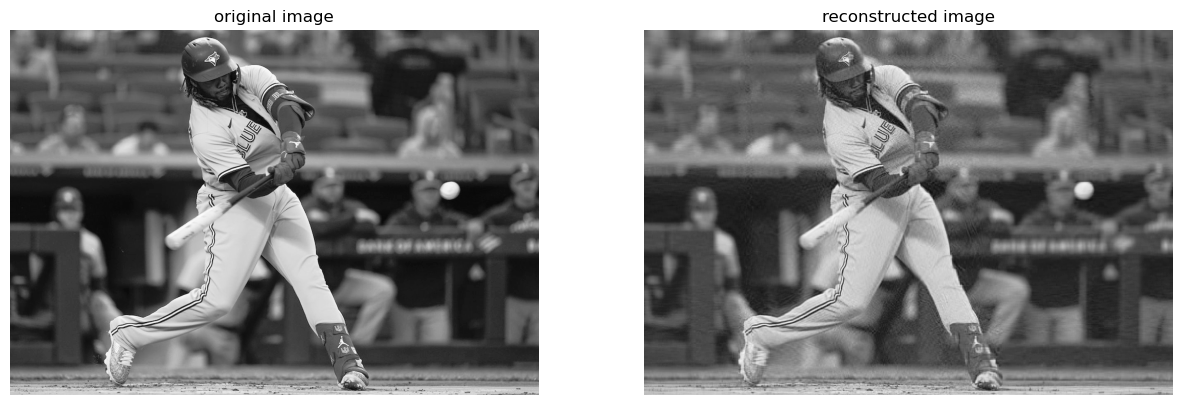

In [106]:
def compare_images(A, A_):

    fig, axarr = plt.subplots(1, 2, figsize = (15, 10))

    axarr[0].imshow(A, cmap = "Greys")
    axarr[0].axis("off")
    axarr[0].set(title = "original image")

    axarr[1].imshow(A_, cmap = "Greys")
    axarr[1].axis("off")
    axarr[1].set(title = "reconstructed image")

print(grey_img.shape)
compare_images(grey_img, a)

## Part 2: Spectral Community Detection

/var/folders/fl/5qx5y4sx03j07bk5cd1whd4c0000gn/T/ipykernel_76986/2083445253.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()
/var/folders/fl/5qx5y4sx03j07bk5cd1whd4c0000gn/T/ipykernel_76986/2083445253.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()


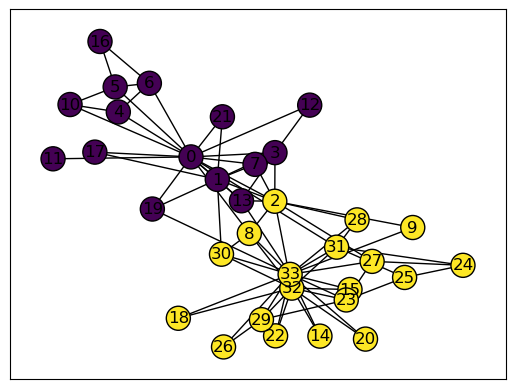

In [80]:
# from sklearn.neighbors import NearestNeighbors
import networkx as nx
from sklearn.metrics import pairwise_distances
import numpy as np

def spectral_clustering(G):
    A = nx.adjacency_matrix(G).toarray()
    A = A + A.T
    A[A > 1] = 1
    D = np.diag(np.sum(A, axis = 0))
    D1 = np.linalg.inv(D)
    L = D1@(D-A)
    w, v = np.linalg.eig(L)
    z_ = v[:, 1]
    z = z_ > 0
    return z
    
G = nx.karate_club_graph()
A = nx.adjacency_matrix(G).toarray()
z = spectral_clustering(G)

nx.draw_networkx(G, layout,
        with_labels=True, 
        node_color = z,
        edgecolors = "black" # confusingly, this is the color of node borders, not of edges
        ) 

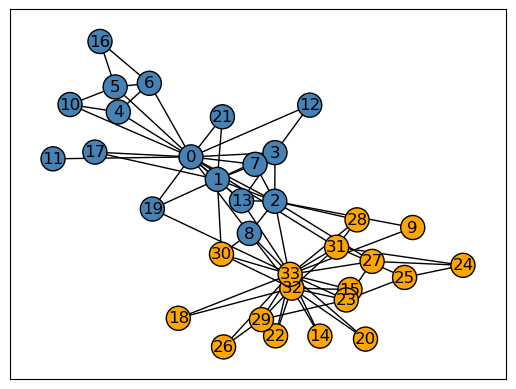

In [73]:
import networkx as nx
G = nx.karate_club_graph()
layout = nx.layout.fruchterman_reingold_layout(G)
#nx.draw(G, layout, with_labels=True, node_color = "steelblue")

clubs = nx.get_node_attributes(G, "club")
nx.draw_networkx(G, layout,
        with_labels=True, 
        node_color = ["orange" if clubs[i] == "Officer" else "steelblue" for i in G.nodes()],
        edgecolors = "black" # confusingly, this is the color of node borders, not of edges
        ) 

In [74]:
G = nx.karate_club_graph()
A = nx.adjacency_matrix(G).toarray()
A = A + A.T
A[A > 1] = 1


print(A)

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


/var/folders/fl/5qx5y4sx03j07bk5cd1whd4c0000gn/T/ipykernel_76986/2910725453.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()


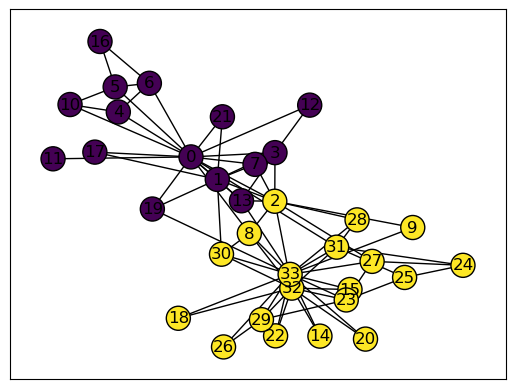

In [79]:
nx.draw_networkx(G, layout,
        with_labels=True, 
        node_color = z,
        edgecolors = "black" # confusingly, this is the color of node borders, not of edges
        ) 